In [22]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize': (30,15)})

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv("../input/dataset.csv")

In [4]:
df.head(5)

,QuestionId,AnsweringTime,QuestionCreationDate,QuestionScore,QuestionViewCount,QuestionTags,QuestionAnswerCount,QuestionCommentCount,OwnerReputation,OwnerViews,OwnerUpVotes,OwnerDownVotes
0,6,14:14:42.9733333,2008-07-31 22:08:08,290,18687,<html><css><internet-explorer-7>,6,0,20928,5675,47,4
1,42,00:55:41.5100000,2008-08-01 12:50:18,267,35073,<php><plugins><architecture><hook>,8,0,7001,829,257,18
2,85,03:25:14.0033333,2008-08-01 14:19:52,116,54973,<php><sql><database><flat-file>,11,2,5637,274,24,4
3,337,00:25:38.9033333,2008-08-02 03:35:55,68,7878,<python><xml>,12,2,3308,404,663,3
4,709,00:05:27.4433333,2008-08-03 14:53:53,49,5988,<c#><.net><visual-studio><unit-testing>,10,1,3308,404,663,3


In [11]:
df['AnsweringTimeTransformed'] = df['AnsweringTime'].apply(lambda x : x.split('.')[0])
df.head()

,QuestionId,AnsweringTime,QuestionCreationDate,QuestionScore,QuestionViewCount,QuestionTags,QuestionAnswerCount,QuestionCommentCount,OwnerReputation,OwnerViews,OwnerUpVotes,OwnerDownVotes,AnsweringTimeTransformed
0,6,14:14:42.9733333,2008-07-31 22:08:08,290,18687,<html><css><internet-explorer-7>,6,0,20928,5675,47,4,14:14:42
1,42,00:55:41.5100000,2008-08-01 12:50:18,267,35073,<php><plugins><architecture><hook>,8,0,7001,829,257,18,00:55:41
2,85,03:25:14.0033333,2008-08-01 14:19:52,116,54973,<php><sql><database><flat-file>,11,2,5637,274,24,4,03:25:14
3,337,00:25:38.9033333,2008-08-02 03:35:55,68,7878,<python><xml>,12,2,3308,404,663,3,00:25:38
4,709,00:05:27.4433333,2008-08-03 14:53:53,49,5988,<c#><.net><visual-studio><unit-testing>,10,1,3308,404,663,3,00:05:27


In [28]:
df['AnsweringTimeDT'] = pd.to_datetime(df['AnsweringTimeTransformed'],format= '%H:%M:%S' ).dt.time

df['AnsweringTimeHours'] = pd.to_datetime(df['AnsweringTimeTransformed'],format= '%H:%M:%S' ).dt.hour

df['AnsweringTimeMinutes'] = pd.to_datetime(df['AnsweringTimeTransformed'],format= '%H:%M:%S' ).dt.minute
df['AnsweringTimeInMinutes'] = df['AnsweringTimeHours'] * 60 + df['AnsweringTimeMinutes']

df['AnsweringTimeSeconds'] = pd.to_datetime(df['AnsweringTimeTransformed'],format= '%H:%M:%S' ).dt.second
df['AnsweringTimeInSeconds'] = df['AnsweringTimeHours'] * 60 * 60 + df['AnsweringTimeMinutes'] * 60 + df['AnsweringTimeSeconds']


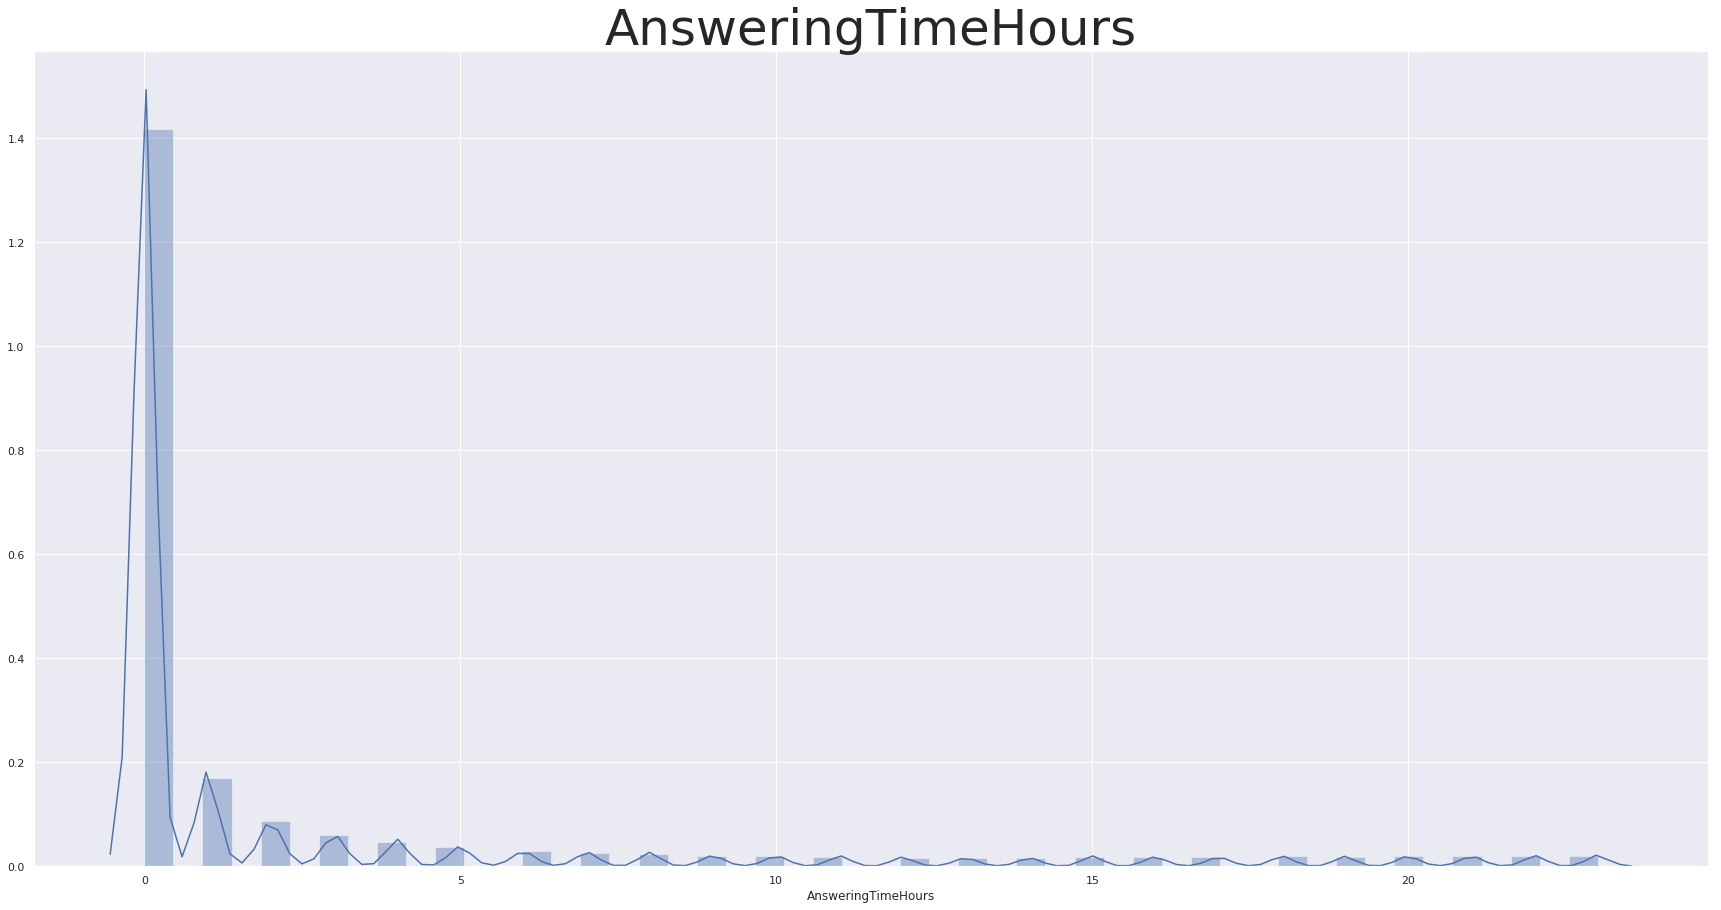

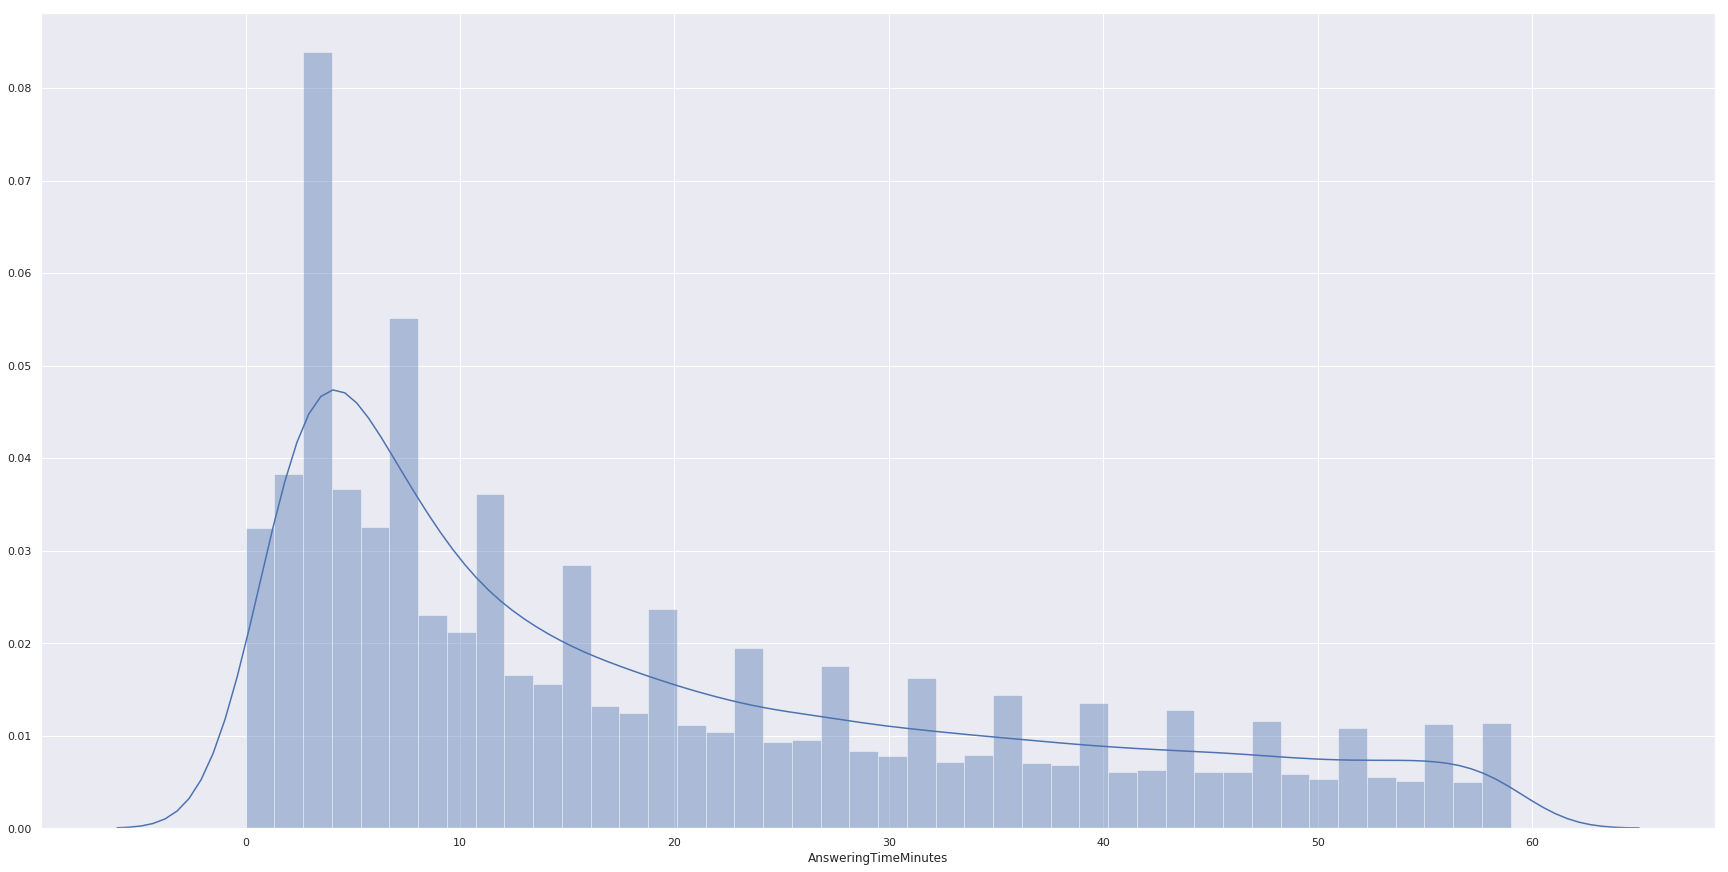

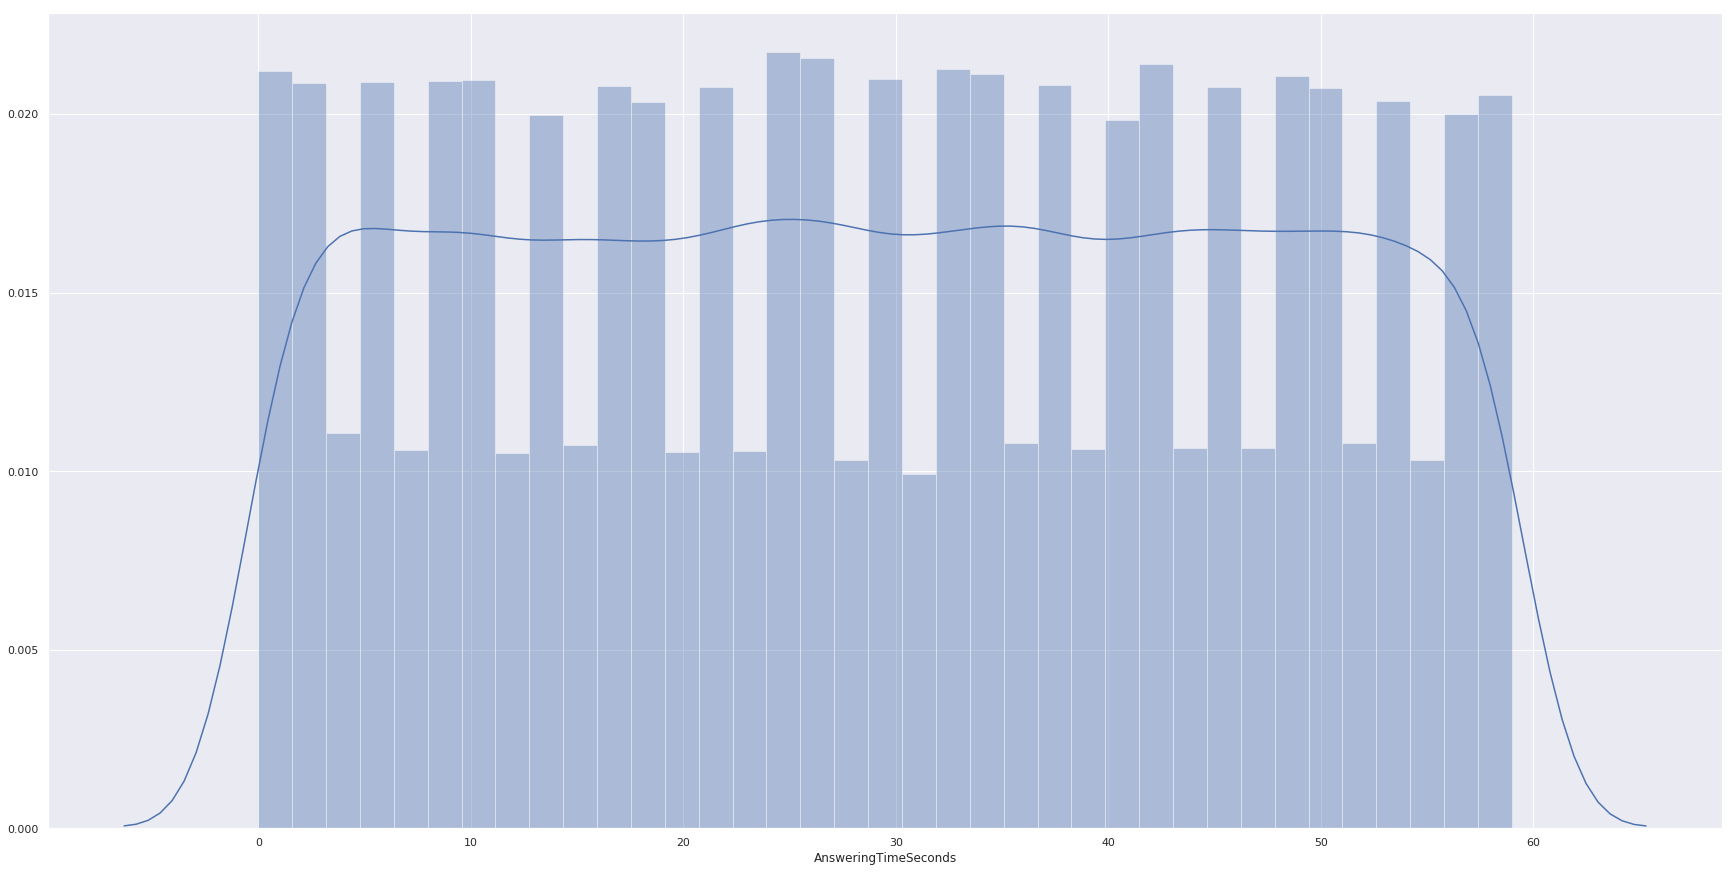

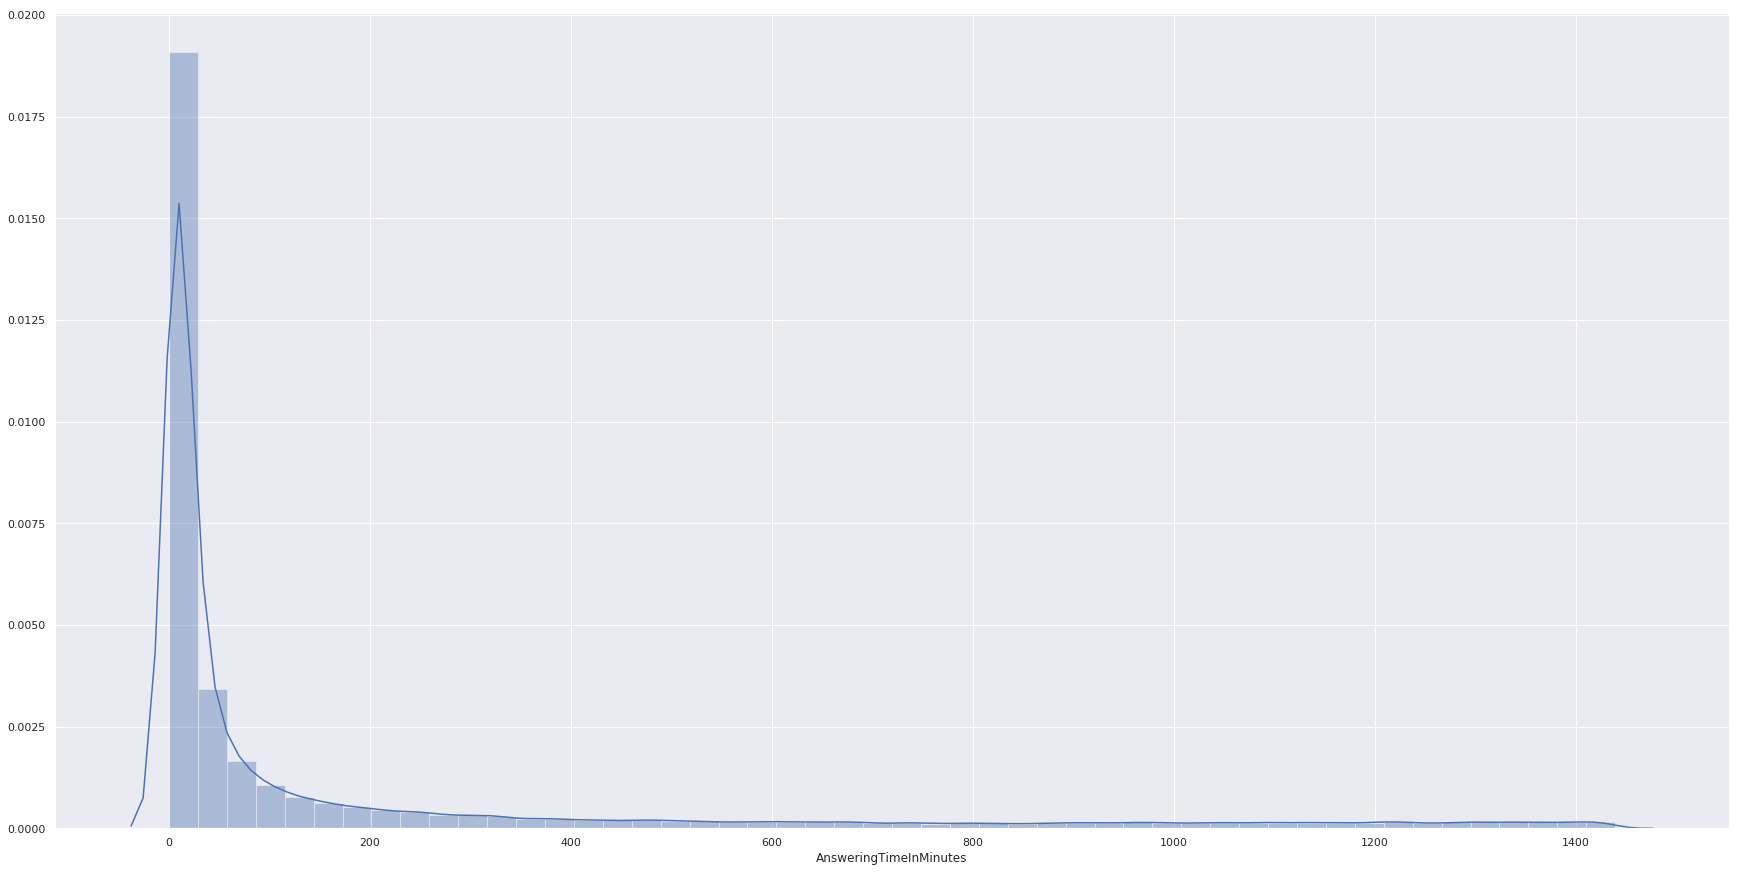

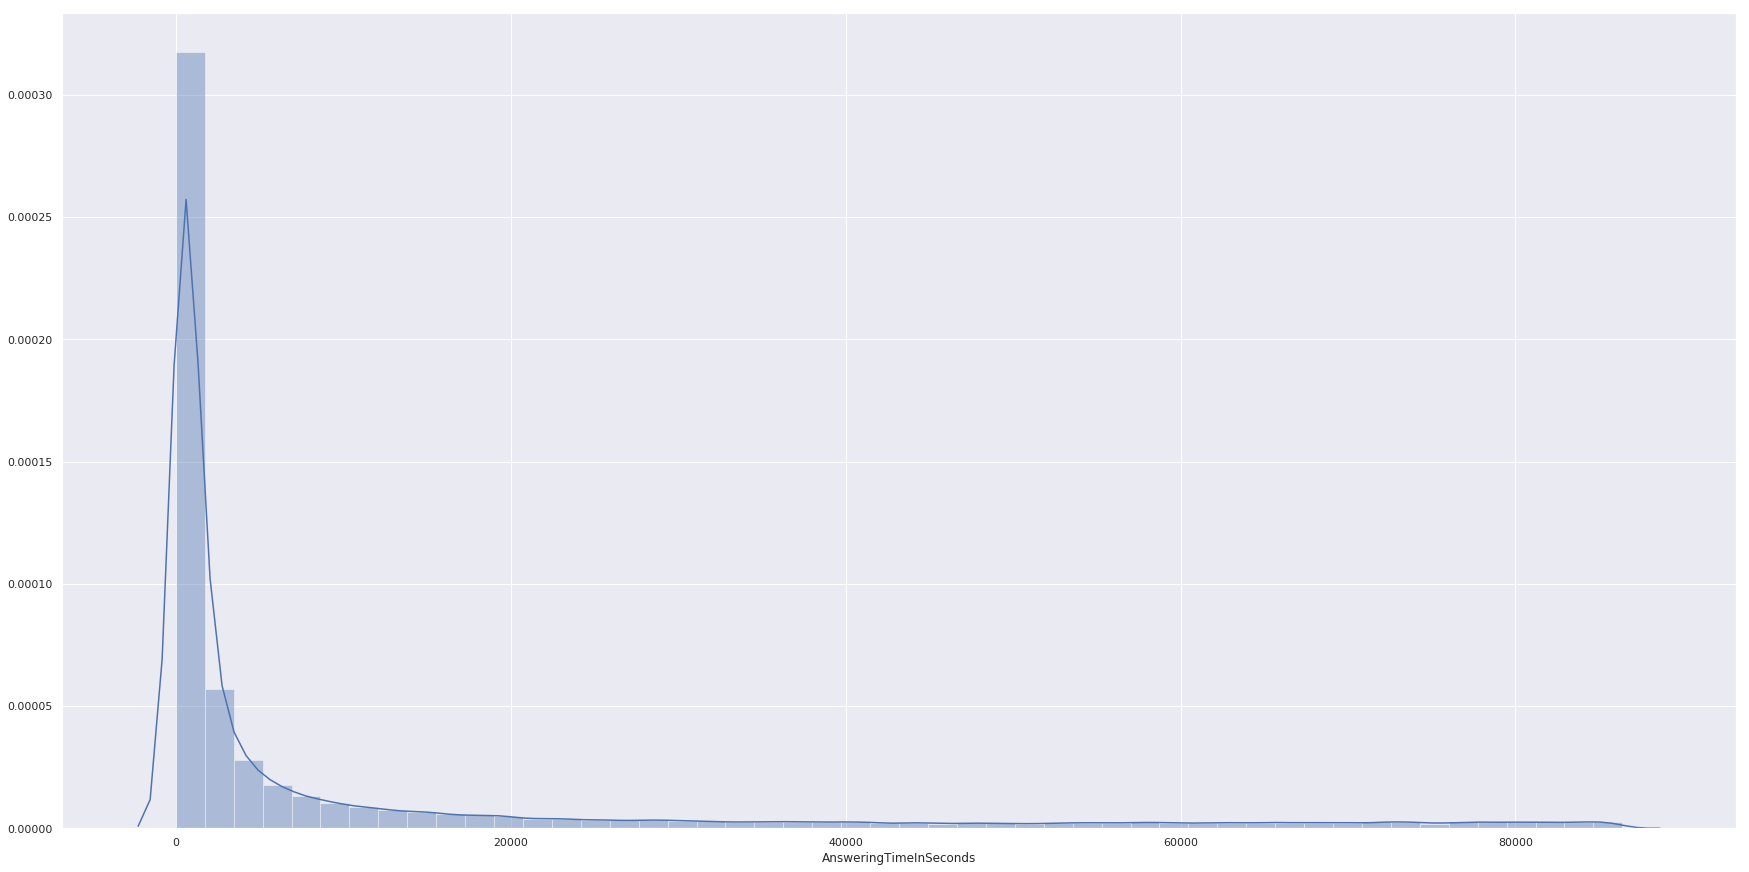

In [31]:
ax = sns.distplot(df.AnsweringTimeHours)
ax.set_title("AnsweringTimeHours",fontsize=50)
plt.show()

ax = sns.distplot(df.AnsweringTimeMinutes)
ax.set_title("AnsweringTimeMinutes",fontsize=50)
plt.show()

ax = sns.distplot(df.AnsweringTimeSeconds)
ax.set_title("AnsweringTimeSeconds",fontsize=50)
plt.show()

ax = sns.distplot(df.AnsweringTimeInMinutes)
ax.set_title("AnsweringTimeInMinutes",fontsize=50)
plt.show()

ax = sns.distplot(df.AnsweringTimeInSeconds)
ax.set_title("AnsweringTimeInSeconds",fontsize=50)
